In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

In [2]:
plt.style.use('/Users/thepoetoftwilight/Documents/CUBS/Code/science.mplstyle')

Write some functions to process data strings

In [3]:
def process_data_str(s, non_det_err):
    
    # Check if the point should be plotted or not
    bool_plot = False
    # Coordinate value
    coord_value = np.nan
    # Lower error
    err_lo = 0
    # Upper error
    err_hi = 0
    # Boolean for upper limit
    uplim = False
    # Boolean for lower limit
    lolim = False
    
    # If we don't have an empty string 
    if len(s)!=0:
        
        # Then it needs to be plotted
        bool_plot = True
        
        # Now, check for a non-detection first
        
        # Upper limit
        if s[0] == '<':
            # Set coordinate value
            coord_value = float(s[1:])
            # Only lower error
            uplim = True
            err_lo = non_det_err
            
        # Lower limit
        elif s[0] == '>':
            # Set coordinate value
            coord_value = float(s[1:])
            # Only upper error
            lolim = True
            err_hi = non_det_err
            
        # Detection
        else:
            s_arr = np.array(s.split(','), dtype=float)
            
            # Errors not provided
            if len(s_arr) == 1:
                coord_value = s_arr[0]
                err_lo = 0
                err_hi = 0
                
            # Errors provided
            else:
                coord_value = s_arr[0]
                err_lo = -s_arr[1] # Negative sign to flip the already present negative sign
                err_hi = s_arr[2]
        
    return bool_plot, coord_value, err_lo, err_hi, uplim, lolim

In [4]:
def plot_data_strings(ax, s_x, s_y, c, m, non_det_err_x=0.3, non_det_err_y=0.3, alpha=1):
    
    # First process each data string
    bool_plot_x, coord_value_x, err_lo_x, err_hi_x, uplim_x, lolim_x = process_data_str(s_x, non_det_err_x)
    bool_plot_y, coord_value_y, err_lo_y, err_hi_y, uplim_y, lolim_y = process_data_str(s_y, non_det_err_y)

    ax.errorbar(x=coord_value_x, y=coord_value_y,
                xerr=[[err_lo_x], [err_hi_x]],
                yerr=[[err_lo_y], [err_hi_y]], 
                color=c, alpha=alpha,
                marker=m, markersize=6.5, capsize=4, elinewidth=0.7,
                xuplims = uplim_x, xlolims= lolim_x,
                uplims = uplim_y, lolims= lolim_y) 

Compare column densities and linewidths for species

In [5]:
def compare_plot(ax, list_1, list_2, non_det_err_x, non_det_err_y, legend_list, marker_dict):

    for i in range(len(list_1)):

        plot_data_strings(ax, list_1[i], list_2[i], 
                          marker_dict[legend_list[i]][0], marker_dict[legend_list[i]][1], 
                          non_det_err_x=non_det_err_x, non_det_err_y=non_det_err_y)

Dictionary of colors and symbols

In [6]:
marker_dict = {'z=0.67': ['salmon', 'o'],
               'z=0.72': ['olivedrab', 'o'],
               'z=1.09': ['mediumslateblue', 'o'],
               'z=1.16, c1': ['slategray', 'o'],
               'z=1.16, c2': ['slategray', '^'],
               'z=1.27, c1': ['tan', 'o'],
               'z=1.27, c2': ['tan', '^']}

First, HI

In [7]:
logN_HI_this = ['15.48, -0.05, +0.05',
                '16.67, -0.02, +0.02',
                '14.3, -0.1, +0.1',
                '16.3, -0.1, +0.1',
                '14.5, -0.2, +0.2',
                '14.08, -0.06, +0.06',
                '13.98, -0.07, +0.07']

logN_HI_lit = ['15.87, -0.04, +0.04',
                '16.50, -0.02, +0.02',
                '14.7, -0.2, +0.2',
                '16.5, -0.1, +0.1',
                '14.7, -0.2, +0.2',
                '14.31, -0.09, +0.09',
                '14.1, -0.1, +0.1',]

b_HI_this = ['35, -1, +2',
            '25.6, -0.4, +0.4',
            '23, -3, +3',
            '21.4, -0.9, +0.9',
            '34, -3, +4',
            '24, -2, +3',
            '36, -9, +10',]

b_HI_lit = ['36, -2, +2',
            '26, -3, +3',
            '25, -3, +3',
            '21, -1, +1',
            '29, -3, +3',
            '25, -5, +5',
            '24, -6, +6',]

HI_legend_list = ['z=0.67', 'z=0.72', 'z=1.09', 'z=1.16, c1', 'z=1.16, c2', 'z=1.27, c1', 'z=1.27, c2']

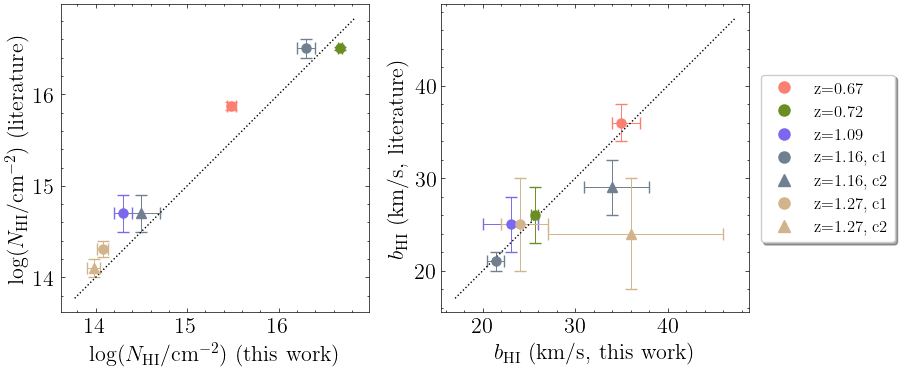

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_HI_this, logN_HI_lit, 0.3, 0.3, HI_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{HI}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{HI}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_HI_this, b_HI_lit, 0.3, 0.3, HI_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{HI}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{HI}}$ (km/s, literature)')

handles = []

for i in range(len(HI_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[HI_legend_list[i]][0], 
                                 marker=marker_dict[HI_legend_list[i]][1],
                  linestyle='None', markersize=8, label=HI_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, HeI

In [9]:
logN_HeI_this = ['14.60, -0.07, +0.09']

logN_HeI_lit = ['14.5, -0.2, +0.2']

b_HeI_this = ['12.4, -0.9, +0.9']

b_HeI_lit = ['14 , -3, +3']

HeI_legend_list = ['z=1.16, c1']

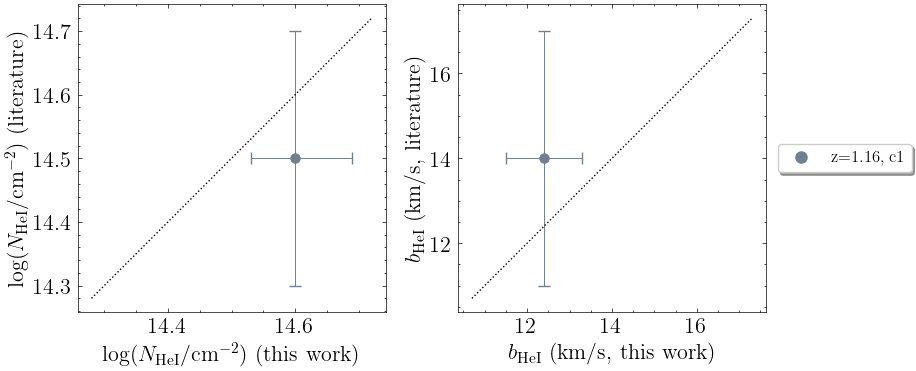

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_HeI_this, logN_HeI_lit, 0.3, 0.3, HeI_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{HeI}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{HeI}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_HeI_this, b_HeI_lit, 0.3, 0.3, HeI_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{HeI}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{HeI}}$ (km/s, literature)')

handles = []

for i in range(len(HeI_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[HeI_legend_list[i]][0], 
                                 marker=marker_dict[HeI_legend_list[i]][1],
                  linestyle='None', markersize=8, label=HeI_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, CIII

In [11]:
logN_CIII_this = ['13.97, -0.05, +0.05',
                '13.41, -0.07, +0.07',
                '>13.8',
                '>13.1',
                '13.0, -0.2, +0.1',
                '<12.4',]

logN_CIII_lit = ['13.9, -0.1, +0.1',
                '13.34, -0.05, +0.05',
                '>13.6',
                '13.8, -0.7, +0.7',
                '13.1, -0.2, +0.2',
                '12.8, -0.2, +0.2',]

b_CIII_this = ['32, -2, +2',
            '16, -3, +3',
            '<32',
            '<29',
            '20, -7, +12',
            '10',]

b_CIII_lit = ['33, -6, +6',
            '17, -3, +3',
            '18',
            '14, -2, +2',
            '10, -1, +1',
            '10, -1, +1']

CIII_legend_list = ['z=0.67', 'z=0.72', 'z=1.09', 'z=1.16, c1', 'z=1.27, c1', 'z=1.27, c2']

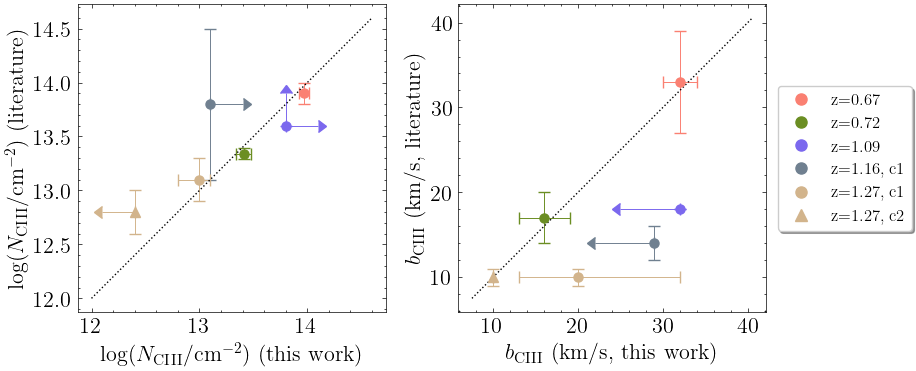

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_CIII_this, logN_CIII_lit, 0.3, 0.3, CIII_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{CIII}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{CIII}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_CIII_this, b_CIII_lit, 7, 7, CIII_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{CIII}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{CIII}}$ (km/s, literature)')

handles = []

for i in range(len(CIII_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[CIII_legend_list[i]][0], 
                                 marker=marker_dict[CIII_legend_list[i]][1],
                  linestyle='None', markersize=8, label=CIII_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, CIV

In [13]:
logN_CIV_this = ['13.68, -0.06, +0.06',
                '13.96, -0.01, +0.01',
                '13.49, -0.02, +0.02',
                '13.01, -0.06, +0.06',
                '13.65, -0.01, +0.01',
                '13.41, -0.01, +0.01',]

logN_CIV_lit = ['13.83, -0.3, +0.3',
                '13.91, -0.02, +0.02',
                '13.4, -0.1, +0.1',
                '12.9, -0.3, +0.3',
                '13.61, -0.02, +0.02',
                '13.42, -0.02, +0.02',]

b_CIV_this = ['33, -4, +5',
            '18.2, -0.3, +0.3',
            '11.1, -0.4, +0.4',
            '26, -3, +3',
            '11.1, -0.2, +0.2',
            '9.8, -0.3, +0.3',]

b_CIV_lit = ['33, -8, +8',
            '18, -1, +1',
            '11, -2, +2',
            '23, -14, +14',
            '10, -1, +1',
            '10, -2, +2',]

CIV_legend_list = ['z=0.67', 'z=1.09', 'z=1.16, c1', 'z=1.16, c2', 'z=1.27, c1', 'z=1.27, c2']

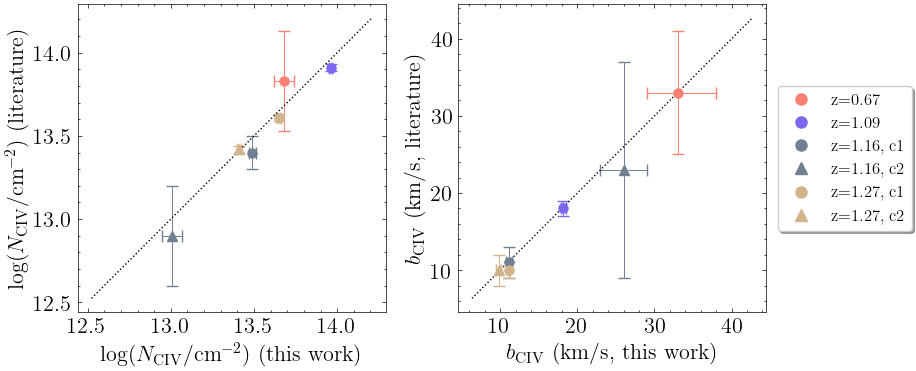

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_CIV_this, logN_CIV_lit, 0.3, 0.3, CIV_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{CIV}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{CIV}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_CIV_this, b_CIV_lit, 7, 7, CIV_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{CIV}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{CIV}}$ (km/s, literature)')

handles = []

for i in range(len(CIV_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[CIV_legend_list[i]][0], 
                                 marker=marker_dict[CIV_legend_list[i]][1],
                  linestyle='None', markersize=8, label=CIV_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, NIV

In [15]:
logN_NIV_this = ['13.0, -0.1, +0.1',
                '13.0, -0.1, +0.1',
                '<12.4',]

logN_NIV_lit = ['13.0, -0.4, +0.4',
                '13.0, -0.1, +0.1',
                '12.5, -0.2, +0.2',]

b_NIV_this = ['12, -6, +6',
            '10, -5, +6',
            '9',]

b_NIV_lit = ['17, -2, +2',
            '9, -1, +1',
            '9, -2, +2',]

NIV_legend_list = ['z=1.09', 'z=1.27, c1', 'z=1.27, c2']

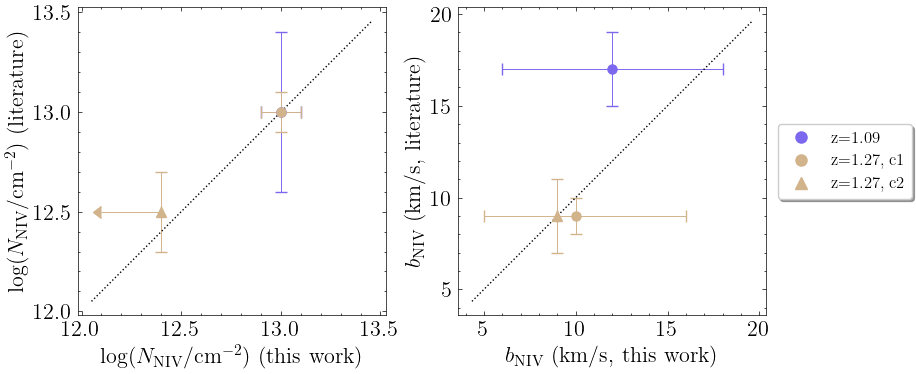

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_NIV_this, logN_NIV_lit, 0.3, 0.3, NIV_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{NIV}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{NIV}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_NIV_this, b_NIV_lit, 7, 7, NIV_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{NIV}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{NIV}}$ (km/s, literature)')

handles = []

for i in range(len(NIV_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[NIV_legend_list[i]][0], 
                                 marker=marker_dict[NIV_legend_list[i]][1],
                  linestyle='None', markersize=8, label=NIV_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, OIII

In [17]:
logN_OIII_this = ['14.42, -0.02, +0.02',
                '13.97, -0.03, +0.03',
                '14.28, -0.02, +0.02',
                '14.16, -0.06, +0.06',
                '13.84, -0.08, +0.08',
                '<13.1',]

logN_OIII_lit = ['14.43, -0.07, +0.07',
                '14.10, -0.06, +0.06',
                '14.23, -0.06, +0.06',
                '14.2, -0.1, +0.1',
                '13.7, -0.1, +0.1',
                '13.2, -0.2, +0.2',]

b_OIII_this = ['34, -2, +2',
            '13, -2, +2',
            '25, -2, +2',
            '16, -2, +3',
            '18, -6, +6',
            '9',]

b_OIII_lit = ['36, -6, +6',
            '19, -4, +4',
            '18, -3, +3',
            '12, -2, +2',
            '9, -1, +1',
            '9, -2, +2',]

OIII_legend_list = ['z=0.67', 'z=0.72', 'z=1.09', 'z=1.16, c1', 'z=1.27, c1', 'z=1.27, c2']

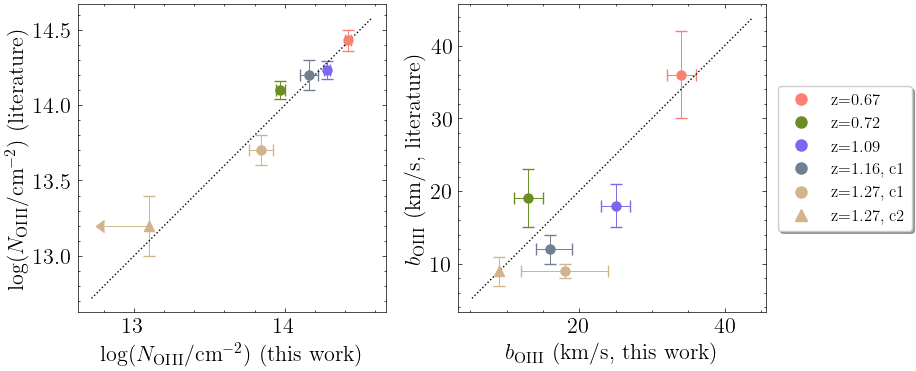

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_OIII_this, logN_OIII_lit, 0.3, 0.3, OIII_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{OIII}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{OIII}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_OIII_this, b_OIII_lit, 7, 7, OIII_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{OIII}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{OIII}}$ (km/s, literature)')

handles = []

for i in range(len(OIII_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[OIII_legend_list[i]][0], 
                                 marker=marker_dict[OIII_legend_list[i]][1],
                  linestyle='None', markersize=8, label=OIII_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, OIV

In [19]:
logN_OIV_this = ['15.00, -0.06, +0.06',
                '14.42, -0.02, +0.02',
                '14.67, -0.02, +0.02',
                '14.38, -0.04, +0.04',
                '13.8, -0.1, +0.1',
                '14.44, -0.05, +0.05',
                '14.21, -0.05, +0.05',]

logN_OIV_lit = ['15.0, -0.2, +0.2',
                '14.4, -0.1, +0.1',
                '14.69, -0.05, +0.05',
                '14.4, -0.1, +0.1',
                '14.0, -0.1, +0.1',
                '14.44, -0.07, +0.07',
                '14.20, -0.04, +0.04',]

b_OIV_this = ['30, -2, +2',
            '30, -2, +2',
            '23, -1, +1',
            '16, -2, +2',
            '26, -5, +7',
            '12, -1, +1',
            '11, -1, +2',]

b_OIV_lit = ['33, -8, +8',
            '22, -4, +4',
            '18, -3, +3',
            '10, -1, +1',
            '22, -7, +7',
            '9, -1, +1',
            '8, -2, +2',]

OIV_legend_list = ['z=0.67', 'z=0.72', 'z=1.09', 'z=1.16, c1', 'z=1.16, c2', 'z=1.27, c1', 'z=1.27, c2']

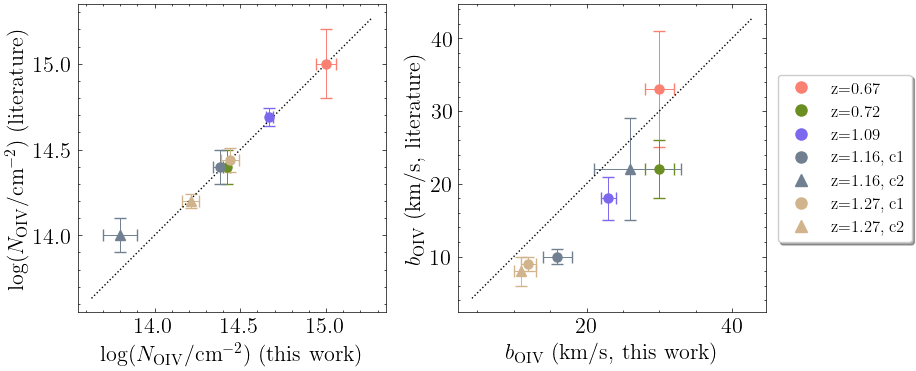

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_OIV_this, logN_OIV_lit, 0.3, 0.3, OIV_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{OIV}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{OIV}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_OIV_this, b_OIV_lit, 7, 7, OIV_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{OIV}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{OIV}}$ (km/s, literature)')

handles = []

for i in range(len(OIV_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[OIV_legend_list[i]][0], 
                                 marker=marker_dict[OIV_legend_list[i]][1],
                  linestyle='None', markersize=8, label=OIV_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, OV

In [21]:
logN_OV_this = ['14.19, -0.03, +0.03',
                '13.7, -0.1, +0.2',
                '13.82, -0.06, +0.06',
                '14.3, -0.1, +0.1',
                '14.13, -0.04, +0.06']

logN_OV_lit = ['14.6, -0.2, +0.2',
            '13.9, -0.2, +0.2',
            '13.7, -0.2, +0.2',
            '14.7, -0.3, +0.3',
            '14.0, -0.2, +0.2']

b_OV_this = ['26, -2, +2',
            '10, -3, +3',
            '27, -3, +3',
            '18, -2, +2',
            '20, -2, +3']

b_OV_lit = ['18, -2, +2',
            '10, -1, +1',
            '22, -7, +7',
            '12, -2, +2',
            '10, -2, +2']

OV_legend_list = ['z=1.09', 'z=1.16, c1', 'z=1.16, c2', 'z=1.27, c1', 'z=1.27, c2']

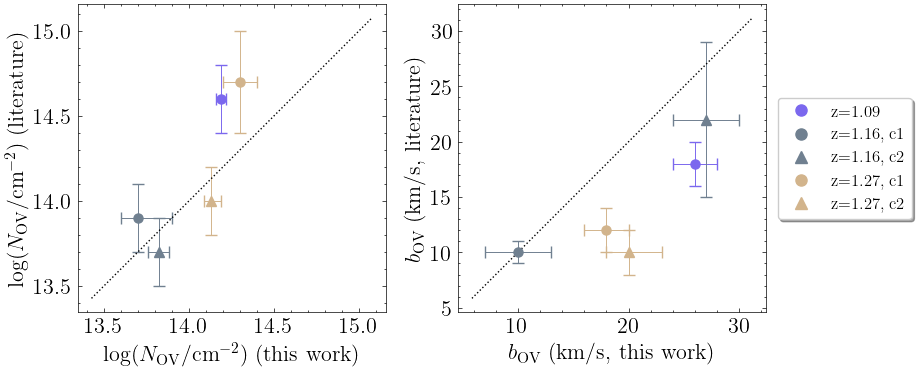

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_OV_this, logN_OV_lit, 0.3, 0.3, OV_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{OV}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{OV}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_OV_this, b_OV_lit, 7, 7, OV_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{OV}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{OV}}$ (km/s, literature)')

handles = []

for i in range(len(OV_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[OV_legend_list[i]][0], 
                                 marker=marker_dict[OV_legend_list[i]][1],
                  linestyle='None', markersize=8, label=OV_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, OVI

In [27]:
logN_OVI_this = ['14.29, -0.03, +0.03',
                '14.17, -0.07, +0.07',
                '13.8, -0.2, +0.2',
                '<13.1',
                '13.8, -0.1, +0.1',
                '14.63, -0.07, +0.09',
                '14.0, -0.1, +0.1']

logN_OVI_lit = ['14.3, -0.1, +0.1',
                '14.00, -0.07, +0.07',
                '14.0, -0.2, +0.2',
                '13.6, -0.2, +0.2',
                '13.8,  -0.1, +0.1',
                '15.5, -0.7, +0.7',
                '14.5, -0.9, +0.9']

b_OVI_this = ['32, -3, +3',
            '76, -14, +17',
            '12, -5, +7',
            '11',
            '45, -12, +24',
            '17, -2, +2',
            '14, -3, +4']

b_OVI_lit = ['39, -11, +11',
            '61, -11, +11',
            '18, -4, +4',
            '10, -2, +2',
            '23, -7, +7',
            '10',
            '9, -3, +3']

OVI_legend_list = ['z=0.67', 'z=0.72', 'z=1.09', 'z=1.16, c1', 'z=1.16, c2', 'z=1.27, c1', 'z=1.27, c2']

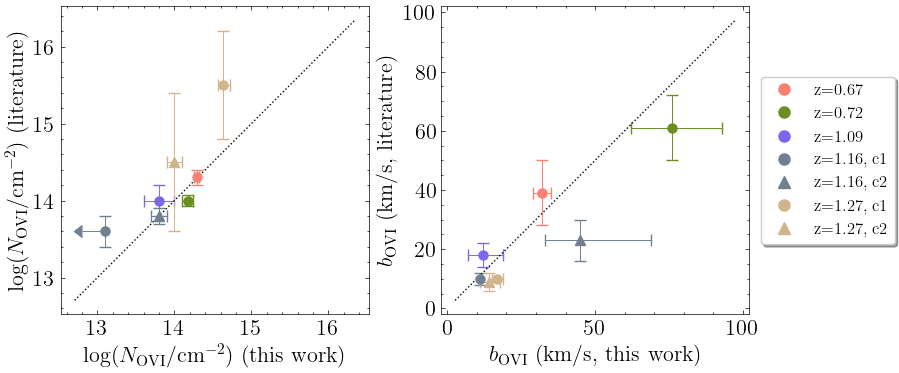

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_OVI_this, logN_OVI_lit, 0.3, 0.3, OVI_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{OVI}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{OVI}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_OVI_this, b_OVI_lit, 7, 7, OVI_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{OVI}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{OVI}}$ (km/s, literature)')

handles = []

for i in range(len(OVI_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[OVI_legend_list[i]][0], 
                                 marker=marker_dict[OVI_legend_list[i]][1],
                  linestyle='None', markersize=8, label=OVI_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Then, NeV

In [29]:
logN_NeV_this = ['14.18, -0.05, +0.05',
                '13.7, -0.2, +0.1',]

logN_NeV_lit = ['14.0, -0.1, +0.1',
                '13.6, -0.2, +0.2',]

b_NeV_this = ['21, -4, +5',
             '15, -6, +8',]

b_NeV_lit = ['8, -1, +1',
            '8, -2, +2',]

NeV_legend_list = ['z=1.27, c1', 'z=1.27, c2']

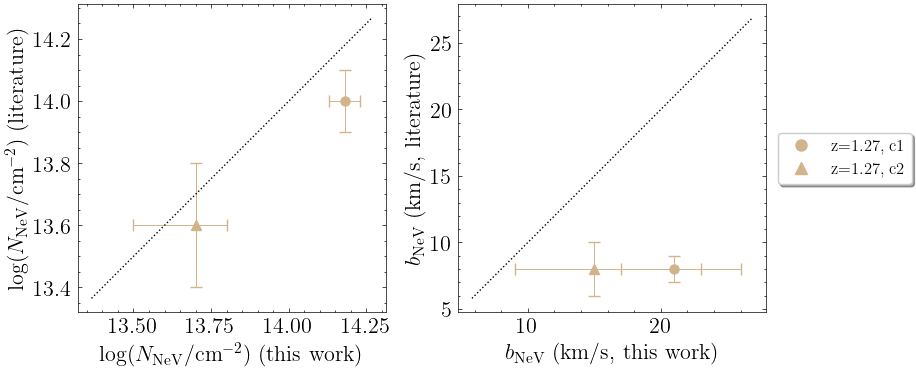

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_NeV_this, logN_NeV_lit, 0.3, 0.3, NeV_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{NeV}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{NeV}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_NeV_this, b_NeV_lit, 7, 7, NeV_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{NeV}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{NeV}}$ (km/s, literature)')

handles = []

for i in range(len(NeV_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[NeV_legend_list[i]][0], 
                                 marker=marker_dict[NeV_legend_list[i]][1],
                  linestyle='None', markersize=8, label=NeV_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)

Finally, NeVI

In [31]:
logN_NeVI_this = ['14.21, -0.05, +0.05',
                '13.96, -0.09, +0.07',]

logN_NeVI_lit = ['14.13, -0.09, +0.09',
                '13.9, -0.1, +0.1',]

b_NeVI_this = ['21, -3, +4',
            '21, -5, +6',]

b_NeVI_lit = ['8, -1, +1',
            '8, -2, +2',]

NeVI_legend_list = ['z=1.27, c1', 'z=1.27, c2']

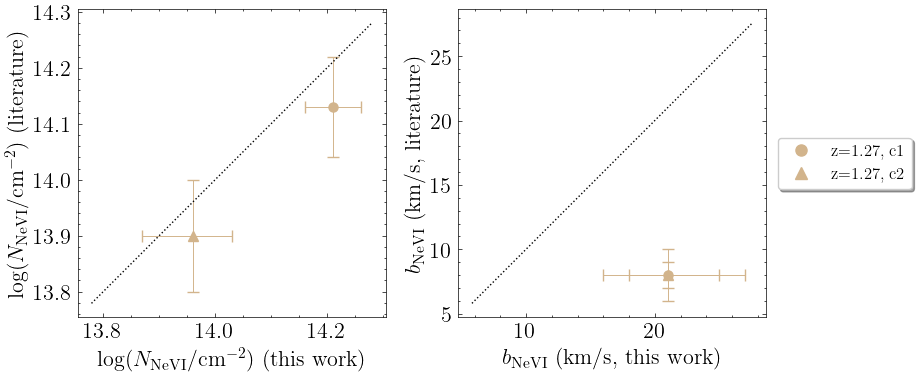

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(4.5*2,4))

compare_plot(axes[0], logN_NeVI_this, logN_NeVI_lit, 0.3, 0.3, NeVI_legend_list, marker_dict)

lims = [
    np.min([axes[0].get_xlim(), axes[0].get_ylim()]),  # min of both axes
    np.max([axes[0].get_xlim(), axes[0].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[0].plot(lims, lims, linestyle=':')
axes[0].set_aspect('equal')

axes[0].set_xlabel(r'$\log(N_{\mathrm{NeVI}}/\mathrm{cm}^{-2})$ (this work)')
axes[0].set_ylabel(r'$\log(N_{\mathrm{NeVI}}/\mathrm{cm}^{-2})$ (literature)')

compare_plot(axes[1], b_NeVI_this, b_NeVI_lit, 7, 7, NeVI_legend_list, marker_dict)

lims = [
    np.min([axes[1].get_xlim(), axes[1].get_ylim()]),  # min of both axes
    np.max([axes[1].get_xlim(), axes[1].get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
axes[1].plot(lims, lims, linestyle=':')
axes[1].set_aspect('equal')

axes[1].set_xlabel(r'$b_{\mathrm{NeVI}}$ (km/s, this work)')
axes[1].set_ylabel(r'$b_{\mathrm{NeVI}}$ (km/s, literature)')

handles = []

for i in range(len(NeVI_legend_list)):
    
    handles.append(mlines.Line2D([], [], 
                                 color=marker_dict[NeVI_legend_list[i]][0], 
                                 marker=marker_dict[NeVI_legend_list[i]][1],
                  linestyle='None', markersize=8, label=NeVI_legend_list[i]))
    
plt.legend(handles=handles, loc='right', bbox_to_anchor=(1.5, 0.5),
          fancybox=True, shadow=True, ncol=1)